In [1]:
import jupyter_fix

jupyter_fix.fix_jupyter_path()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import src.utility.letter_operations as lo
import cv2
from src.utility import dataset_loader
import re
from pathlib import Path

# np.random.seed(1)

plt.style.use('grayscale')


# sheet parameters
columns = 80
rows = 114
cell = 32
max_chars = columns * rows

noise = 0.75

# Load letters images and mappings for KUZUSHIJI-49 and EMNIST-BYMERGE

In [3]:
kuzushiji_letters, kuzushiji_mapping = dataset_loader.load_kuzushiji()
del kuzushiji_mapping[48] # deleting iterative character

In [4]:
!pwd

/home/jakub/PycharmProjects/uczenie-nienadzorowane-projekt


In [5]:
emnist_letters, emnist_mapping = dataset_loader.load_emnist_bymerge()
emnist_mapping_inverted = {v: k for k, v in emnist_mapping.items()}

# Load text data

In [6]:
with open('data/winnie_the_pooh/pg67098.txt', 'r') as file:
    data = file.read()

In [7]:
list(data)

['\ufeff',
 'T',
 'h',
 'e',
 ' ',
 'P',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 ' ',
 'G',
 'u',
 't',
 'e',
 'n',
 'b',
 'e',
 'r',
 'g',
 ' ',
 'e',
 'B',
 'o',
 'o',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'W',
 'i',
 'n',
 'n',
 'i',
 'e',
 '-',
 't',
 'h',
 'e',
 '-',
 'P',
 'o',
 'o',
 'h',
 ',',
 ' ',
 'b',
 'y',
 ' ',
 'A',
 '.',
 ' ',
 'A',
 '.',
 ' ',
 'M',
 'i',
 'l',
 'n',
 'e',
 '\n',
 '\n',
 'T',
 'h',
 'i',
 's',
 ' ',
 'e',
 'B',
 'o',
 'o',
 'k',
 ' ',
 'i',
 's',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'u',
 's',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 'a',
 'n',
 'y',
 'o',
 'n',
 'e',
 ' ',
 'a',
 'n',
 'y',
 'w',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'U',
 'n',
 'i',
 't',
 'e',
 'd',
 ' ',
 'S',
 't',
 'a',
 't',
 'e',
 's',
 ' ',
 'a',
 'n',
 'd',
 '\n',
 'm',
 'o',
 's',
 't',
 ' ',
 'o',
 't',
 'h',
 'e',
 'r',
 ' ',
 'p',
 'a',
 'r',
 't',
 's',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 '

### Process text to only contain letters, numbers and whitespaces

also currently we start from chapter 1 (might change in future)

In [8]:
pattern = re.compile('^[a-zA-Z0-9 ]*$')

result = "".join([s for s in data if pattern.match(s)])
result = list(result)

### Display text to verify processing results

In [9]:
result

['T',
 'h',
 'e',
 ' ',
 'P',
 'r',
 'o',
 'j',
 'e',
 'c',
 't',
 ' ',
 'G',
 'u',
 't',
 'e',
 'n',
 'b',
 'e',
 'r',
 'g',
 ' ',
 'e',
 'B',
 'o',
 'o',
 'k',
 ' ',
 'o',
 'f',
 ' ',
 'W',
 'i',
 'n',
 'n',
 'i',
 'e',
 't',
 'h',
 'e',
 'P',
 'o',
 'o',
 'h',
 ' ',
 'b',
 'y',
 ' ',
 'A',
 ' ',
 'A',
 ' ',
 'M',
 'i',
 'l',
 'n',
 'e',
 '\n',
 '\n',
 'T',
 'h',
 'i',
 's',
 ' ',
 'e',
 'B',
 'o',
 'o',
 'k',
 ' ',
 'i',
 's',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'u',
 's',
 'e',
 ' ',
 'o',
 'f',
 ' ',
 'a',
 'n',
 'y',
 'o',
 'n',
 'e',
 ' ',
 'a',
 'n',
 'y',
 'w',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'U',
 'n',
 'i',
 't',
 'e',
 'd',
 ' ',
 'S',
 't',
 'a',
 't',
 'e',
 's',
 ' ',
 'a',
 'n',
 'd',
 '\n',
 'm',
 'o',
 's',
 't',
 ' ',
 'o',
 't',
 'h',
 'e',
 'r',
 ' ',
 'p',
 'a',
 'r',
 't',
 's',
 ' ',
 'o',
 'f',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'a',
 't',
 ' ',
 'n',
 'o',
 ' ',
 'c',
 

##### Verify if every character is letter, number or space

In [10]:
assert all(character.isalnum() or character.isspace() for character in result)

# Generate sheets with characters

### Generate empty sheet

In [11]:
empty_sheet = np.zeros(shape=(rows * cell, columns * cell))

### Verify sheet visually

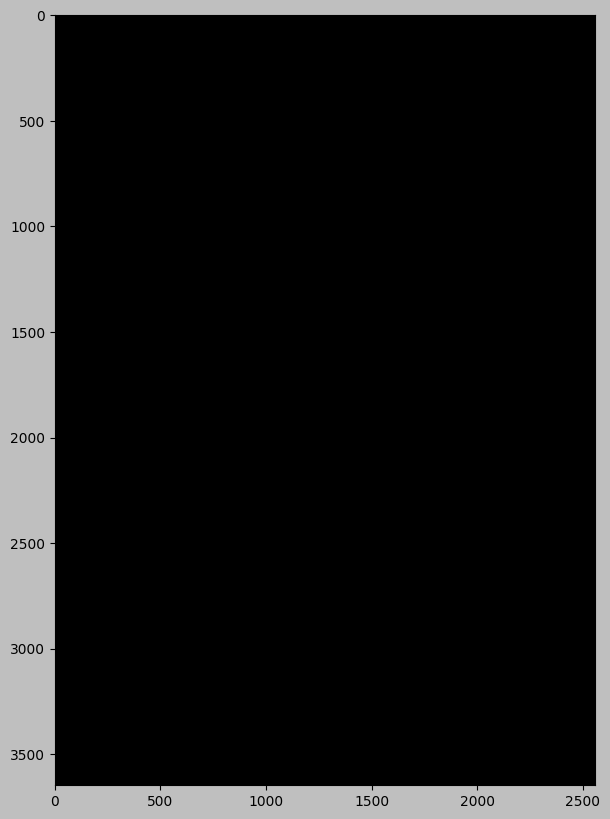

In [12]:
plt.figure(figsize=(10, 10))
plt.imshow(empty_sheet)

##### Map emnist symbols to kuzushiji randomly

In [13]:
temporary_list = list(kuzushiji_mapping.keys())
np.random.shuffle(temporary_list)

emnist_to_kuzushiji_mapping = dict()
for element in range(len(emnist_mapping.keys())):
    emnist_to_kuzushiji_mapping[emnist_mapping[element]] = temporary_list[element]

### Some lowercase letters are missing from dataset, we fix this by mapping missing letters to uppercase ones

In [14]:
missing_letters = ['u','i','j','k','l','m','o','p','c','y','v','s','w','x','z']

for ml in missing_letters:
    emnist_mapping_inverted[ml] = emnist_mapping_inverted[ml.upper()]
    emnist_to_kuzushiji_mapping[ml] = emnist_to_kuzushiji_mapping[ml.upper()]

#### Show generated mapping of emnist to kuzushiji for later reference

In [15]:
for element in range(len(emnist_mapping.keys())):
    print(f'{emnist_mapping[element]} --> {kuzushiji_mapping[temporary_list[element]]}')

0 --> つ
1 --> ゑ
2 --> す
3 --> を
4 --> と
5 --> か
6 --> も
7 --> え
8 --> う
9 --> へ
A --> て
B --> ね
C --> た
D --> ゐ
E --> け
F --> む
G --> し
H --> わ
I --> よ
J --> そ
K --> の
L --> め
M --> り
N --> る
O --> は
P --> ろ
Q --> ち
R --> さ
S --> ゆ
T --> ひ
U --> ら
V --> こ
W --> せ
X --> く
Y --> あ
Z --> ぬ
a --> み
b --> ふ
d --> お
e --> き
f --> ほ
g --> に
h --> れ
n --> い
q --> ん
r --> な
t --> や


#### Generate characters sheets, add noise, threshold

In [16]:
l_idx = 0

sheets_kuzushiji = list()

while l_idx < len(result):
    kuzushiji_sheet = empty_sheet.copy()
    for i in range(0, kuzushiji_sheet.shape[0], 32):
        if l_idx >= len(result):
            break
        for j in range(0, kuzushiji_sheet.shape[1], 32):
            if l_idx >= len(result):
                break
            if result[l_idx] == '\n':
                l_idx += 1
                break
            elif result[l_idx] == ' ':
                kuzushiji_sheet[i:i + 32, j:j + 32] = (np.zeros(shape=(32, 32)))
            else:
                random_choice = np.random.choice(kuzushiji_letters[emnist_to_kuzushiji_mapping[result[l_idx]]].shape[0], 1)[0] # random_choice = 1
                plain_character = kuzushiji_letters[emnist_to_kuzushiji_mapping[result[l_idx]]][random_choice]
                if np.random.random() < 0.3:
                    plain_character = lo.stretch_cv2(plain_character, np.round(np.random.uniform(0.85, 1.15), 2), np.random.randint(0, 2))
                if np.random.random() < 0.3:
                    plain_character = lo.rotate_cv2(plain_character, np.round(np.random.uniform(-30, 30)))
                kuzushiji_sheet[i:i + 32, j:j + 32] = plain_character
            l_idx += 1
    kuzushiji_sheet = lo.thresholding(kuzushiji_sheet, 127)
    kuzushiji_sheet = lo.noise(kuzushiji_sheet, noise)
    kuzushiji_sheet = lo.invert_pixels(kuzushiji_sheet)
    sheets_kuzushiji.append(kuzushiji_sheet)

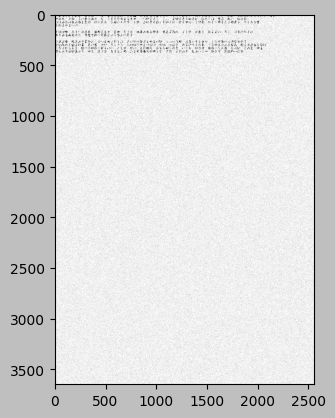

In [17]:
kuzushiji_sheet = lo.thresholding(kuzushiji_sheet, 128)
kuzushiji_sheet = lo.noise(kuzushiji_sheet, noise)
plt.imshow(kuzushiji_sheet)

In [18]:
path = 'data/generated/kuzushiji/all/'

for idx in range(len(sheets_kuzushiji)):
    cv2.imwrite(path + "kuzushiji_" + str(idx) + ".png", sheets_kuzushiji[idx])

In [19]:
l_idx = 0

sheets_emnist = list()

while l_idx < len(result):
    emnist_sheet = empty_sheet.copy()
    for i in range(0, emnist_sheet.shape[0], 32):
        if l_idx >= len(result):
            break
        for j in range(0, emnist_sheet.shape[1], 32):
            if l_idx >= len(result):
                break
            if result[l_idx] == '\n':
                l_idx += 1
                break
            elif result[l_idx] == ' ':
                emnist_sheet[i:i + 32, j:j + 32] = (np.zeros(shape=(32, 32)))
            else:
                random_choice = np.random.choice(emnist_letters[emnist_mapping_inverted[result[l_idx]]].shape[0], 1)[0] # random_choice = 1
                plain_character = emnist_letters[emnist_mapping_inverted[result[l_idx]]][random_choice]
                if np.random.random() < 0.3:
                    plain_character = lo.stretch_cv2(plain_character, np.round(np.random.uniform(0.85, 1.15), 2), np.random.randint(0, 2))
                if np.random.random() < 0.3:
                    plain_character = lo.rotate_cv2(plain_character, np.round(np.random.uniform(-30, 30)))
                emnist_sheet[i:i + 32, j:j + 32] = plain_character
            l_idx += 1
    emnist_sheet = lo.thresholding(emnist_sheet, 127)
    emnist_sheet = lo.noise(emnist_sheet, noise)
    emnist_sheet = lo.invert_pixels(emnist_sheet)
    sheets_emnist.append(emnist_sheet)

KeyboardInterrupt: 

In [ ]:
print(len(sheets_emnist))
plt.imshow(sheets_emnist[35])

In [ ]:
path = 'data/generated/emnist/all/'

for idx in range(len(sheets_emnist)):
    cv2.imwrite(path + "emnist_" + str(idx) + ".png", sheets_emnist[idx])